In [3]:
import numpy as np
import matplotlib.pyplot as plt

import mne
import scipy

from mne.viz import circular_layout
from mne_connectivity import spectral_connectivity_epochs
from mne_connectivity.viz import plot_connectivity_circle

from mne.minimum_norm import make_inverse_operator, apply_inverse_raw, source_band_induced_power, apply_inverse_epochs,compute_source_psd, compute_source_psd_epochs

In [4]:
dic = {
'PASP001':'s15363',
'PASP002':'s15508',
'PASP004':'15763',
'PASP014':'17105',
'PASP017':'15913',
'PASP019':'16850',
'PASP020':'17053',
'PASP021':'16803',
'PASP022':'16190',
'PASP023':'16408',
'PASP028':'16591',
'PASP029':'16547',
'PASP030':'16527',
'PASP031':'16342',
'PASP033':'16883'
}

In [5]:
Patient_list = ['PASP001_md1_NL_AR', 'PASP002_lr_AR_NL','PASP003_kb_NR_AL', 'PASP004_fm_NR_AL', 'PASP005_je_AL_NR', 
                'PASP006_ed','PASP007_kj_AR_NL', 'PASP008_gv_NR_AL', 'PASP009_kk_AR_NL', 'PASP010_ka', 'PASP011_gc_NL_AR',
                'PASP012_ct_AR_NL', 'PASP013_yd_NL_AR', 'PASP014_bs_NL_AR','PASP015_da_NR_AL', 'PASP016_ca_NR_AL',
                'PASP017_md2_AL_NR', 'PASP018_ht','PASP019_bj2_AR_NL', 'PASP020_rp_NL_AR', 'PASP021_bj1_AL_NR',
                'PASP022_sa_NL_AR', 'PASP023_ie_NL_AR', 'PASP025_wl_AR_NL', 'PASP026_mj_AL_NR', 'PASP027_me_AL_NR',
                'PASP028_lt_NL_AR', 'PASP029_wr_AL_NR', 'PASP030_hj_NR_AL', 'PASP031_pp_AL_NR', 'PASP032_nd_AL_NR',
                'PASP033_sa2_NL_AR']



Patient_list_with_MRI = ['PASP001_md1_NL_AR', 'PASP002_lr_AR_NL', 'PASP004_fm_NR_AL', 'PASP014_bs_NL_AR', 'PASP017_md2_AL_NR',
                            'PASP022_sa_NL_AR', 'PASP023_ie_NL_AR', 'PASP028_lt_NL_AR', 'PASP029_wr_AL_NR', 'PASP030_hj_NR_AL',
                            'PASP031_pp_AL_NR','PASP019_bj2_AR_NL' , 'PASP021_bj1_AL_NR', 'PASP020_rp_NL_AR', 'PASP033_sa2_NL_AR']


Patient_avoid = [ 'PASP009_kk_AR_NL','PASP011_gc_NL_AR','PASP019_bj2_AR_NL']
#Patient_avoid= []

Control_list1 = ["PASC001_cb_L_R_good", "PASC003_ck_R_L_good", "PASC004_tc", "PASC005_af_R_L_good", "PASC007_ee", 
                "PASC009_rg_R_L_good", "PASC010_bk_R_L_good", "PASC011_ls_R_L_good", "PASC012_kk1_R_L_good", 
                "PASC013_va_L_R_good",  "PASC015_rj_R_L_good", "PASC018_mm_L_R_good", 
                "PASC019_bo_L_R_good", "PASC020_lj_R_L_good", "PASC022_po_R_L_good", "PASC023_bj_R_L_good", 
                "PASC024_ko_L_R_good", "PASC025_hr_L_R_good", "PASC027_yj_R_L_good", "PASC028_kp_L_R_good", 
                "PASC029_aa_L_R_good", "PASC030_kk2_L_R_good", "PASC032_pm", "PASC033_tb_L_R_good", 
                "PASC034_mk_R_L_good", "PASC035_sk_R_L_good", "PASC036_ss", "PASC037_gr_L_R_good", 
                "PASC038_ge_R_L_good"]#,"PASC014_sl_L_R_good", "FASC004_tk_L", "PASC039_fk_R_L_good"]#, "PASC040_tj_L_R_good",  "PASC041_aa"]


#Control_list = [
#    "PASC011_ls_R_L_good", "PASC041_aa", "PASC032_pm", "PASC036_ss", "PASC020_lj_R_L_good",
#    "PASC037_gr_L_R_good", "PASC029_aa_L_R_good", "PASC035_sk_R_L_good", "PASC033_tb_L_R_good",
#    "PASC013_va_L_R_good", "PASC005_af_R_L_good", "PASC019_bo_L_R_good", "PASC027_yj_R_L_good",
#    "PASC022_po_R_L_good", "PASC023_bj_R_L_good", "PASC038_ge_R_L_good", "PASC012_kk1_R_L_good"
#]

#"PASC014"
#Patient_list = [
#    'PASP001_md1_NL_AR', 'PASP004_fm_NR_AL', 'PASP005_je_AL_NR', 'PASP007_kj_AR_NL',
#    'PASP008_gv_NR_AL', 'PASP010_ka', 'PASP012_ct_AR_NL', 'PASP015_da_NR_AL',
#    'PASP016_ca_NR_AL', 'PASP020_rp_NL_AR', 'PASP023_ie_NL_AR', 'PASP026_mj_AL_NR',
#    'PASP028_lt_NL_AR', 'PASP029_wr_AL_NR', 'PASP030_hj_NR_AL', 'PASP033_sa2_NL_AR',
#    'PASP006_ed'
#]

Camcan_list = ["CC121411","CC120218","CC220115","CC221886","CC221040","CC221511","CC220974",
               "CC221002","CC221585","CC221220","CC321137","CC320568","CC321595","CC320893",
               "CC320089","CC410323","CC420392","CC420236","CC420396","CC420433","CC410222",
               "CC410173","CC420148","CC410289","CC410297","CC510609","CC520168","CC510551",
               "CC510076","CC510115","CC620405"]

Camcan_list2 = ["CC120319","CC210519","CC221209","CC221595","CC223286","CC210088","CC220999",
                "CC220198","CC222496","CC221352","CC310410","CC320759","CC310463","CC320850",
                "CC320888","CC410015","CC420493","CC420060","CC420623","CC420202","CC420197",
                "CC410179","CC420462","CC410287","CC410243","CC520042","CC510629","CC510242",
                "CC510548","CC510433","CC610227"]

control_type = 'control'
if control_type == 'camcan':
    Control_list = Camcan_list
if control_type == 'camcan2':
    Control_list = Camcan_list2
if control_type == 'mixed':
    Control_list = Mixed_list
if control_type == 'control':
    Control_list = Control_list1
Control_list_no_MRI = ["PASC004_tc", "PASC007_ee", "PASC032_pm", "PASC036_ss", "PASC041_aa", 'PASC028_kp_L_R_good']

Control_avoid = [] #'PASC014_sl_L_R_good'

print(len(Control_list))
print(len(Patient_list))

29
32


In [6]:
#,"PASC023"]
#Patient_list = [
#    "PASP001_md1_NL_AR", "PASP004_fm_NR_AL", "PASP005_je_AL_NR",
#    "PASP007_kj_AR_NL", "PASP008_gv_NR_AL", "PASP010_ka",
#    "PASP012_ct_AR_NL", "PASP015_da_NR_AL", "PASP016_ca_NR_AL",
#    "PASP020_rp_NL_AR", "PASP023_ie_NL_AR", "PASP026_mj_AL_NR",
#    "PASP028_lt_NL_AR", "PASP029_wr_AL_NR", "PASP030_hj_NR_AL",
#    "PASP033_sa2_NL_AR", "PASP006_ed"]

#Control_list = [
#    "PASC011_ls_R_L_good", "PASC041_aa", "PASC032_pm",
#    "PASC036_ss", "PASC020_lj_R_L_good", "PASC037_gr_L_R_good",
#    "PASC029_aa_L_R_good", "PASC035_sk_R_L_good", "PASC033_tb_L_R_good",
#    "PASC013_va_L_R_good", "PASC005_af_R_L_good", "PASC019_bo_L_R_good",
#    "PASC027_yj_R_L_good", "PASC022_po_R_L_good", "PASC023_bj_R_L_good",
#    "PASC038_ge_R_L_good", "PASC012_kk1_R_L_good"]


Patient_list_matched = ['PASP030_hj_NR_AL', 'PASP005_je_AL_NR', 'PASP015_da_NR_AL',
 'PASP016_ca_NR_AL', 'PASP026_mj_AL_NR', 'PASP004_fm_NR_AL', 'PASP008_gv_NR_AL',
 'PASP012_ct_AR_NL', 'PASP032_nd_AL_NR', 'PASP027_me_AL_NR', 'PASP013_yd_NL_AR',
  'PASP033_sa2_NL_AR', 'PASP007_kj_AR_NL', 'PASP029_wr_AL_NR',
 'PASP023_ie_NL_AR', 'PASP020_rp_NL_AR',  'PASP014_bs_NL_AR', 'PASP018_ht', 'PASP025_wl_AR_NL', 'PASP001_md1_NL_AR']


# Age and Gender Matched
Control_list_matched = ['PASC038_ge_R_L_good',  'PASC011_ls_R_L_good', 'PASC033_tb_L_R_good',
 'PASC027_yj_R_L_good', 'PASC013_va_L_R_good', 'PASC041_aa', 'PASC035_sk_R_L_good',
 'PASC037_gr_L_R_good', 'PASC036_ss', 'PASC029_aa_L_R_good', 'PASC032_pm',
'PASC022_po_R_L_good', 'PASC005_af_R_L_good', 'PASC020_lj_R_L_good',
 'PASC019_bo_L_R_good', 'PASC023_bj_R_L_good',  'PASC012_kk1_R_L_good', 'FASC004_tk_L', 'PASC014_sl_L_R_good', 'PASC034_mk_R_L_good']
#,"PASP014"]
print(len(Patient_list_matched))
print(len(Control_list_matched))

20
20


In [7]:
pain_rating = {'PASP001':5,'PASP002':6, 'PASP003':6, 'PASP004':6,'PASP005':8,
               'PASP007':5,'PASP008':5, 'PASP010':0,'PASP012':3.5, 'PASP013':4,
               'PASP014':5,'PASP015':3,
               'PASP016':7,'PASP017':3,'PASP020':2.5,
               'PASP021': 7,'PASP022':4,'PASP023':4.5,'PASP025':8, 
               'PASP026':5.5, 'PASP027':5,'PASP028':3,'PASP029':6, 'PASP030':7, 'PASP031':5.5,'PASP032':7,'PASP033': 4.5
               } # 
len(pain_rating)

27

In [8]:
subjects_dir = 'C:/Users/malann/mne_data/MNE-fsaverage-data'
subject = "fsaverage"
trans = "fsaverage"  # MNE has a built-in fsaverage transformation
src_fname = subjects_dir+'/'+subject+"/bem"+"/fsaverage-ico-4-src.fif"
bem = subjects_dir+'/'+subject+"/bem"+"/fsaverage-5120-5120-5120-bem-sol.fif"
src = mne.read_source_spaces(src_fname)

labels_all = mne.read_labels_from_annot(subject, parc='aparc',
                                    subjects_dir=subjects_dir)
labels_all = labels_all[:-1]
label_colors = [label.color for label in labels_all]

    Reading a source space...
    [done]
    Reading a source space...
    [done]
    2 source spaces read
Reading labels from parcellation...
   read 35 labels from C:\Users\malann\mne_data\MNE-fsaverage-data\fsaverage\label\lh.aparc.annot
   read 34 labels from C:\Users\malann\mne_data\MNE-fsaverage-data\fsaverage\label\rh.aparc.annot


In [9]:
labels_all

[<Label | fsaverage, 'bankssts-lh', lh : 2137 vertices>,
 <Label | fsaverage, 'bankssts-rh', rh : 2196 vertices>,
 <Label | fsaverage, 'caudalanteriorcingulate-lh', lh : 1439 vertices>,
 <Label | fsaverage, 'caudalanteriorcingulate-rh', rh : 1608 vertices>,
 <Label | fsaverage, 'caudalmiddlefrontal-lh', lh : 3736 vertices>,
 <Label | fsaverage, 'caudalmiddlefrontal-rh', rh : 3494 vertices>,
 <Label | fsaverage, 'cuneus-lh', lh : 1630 vertices>,
 <Label | fsaverage, 'cuneus-rh', rh : 1638 vertices>,
 <Label | fsaverage, 'entorhinal-lh', lh : 1102 vertices>,
 <Label | fsaverage, 'entorhinal-rh', rh : 902 vertices>,
 <Label | fsaverage, 'frontalpole-lh', lh : 272 vertices>,
 <Label | fsaverage, 'frontalpole-rh', rh : 369 vertices>,
 <Label | fsaverage, 'fusiform-lh', lh : 4714 vertices>,
 <Label | fsaverage, 'fusiform-rh', rh : 4661 vertices>,
 <Label | fsaverage, 'inferiorparietal-lh', lh : 7871 vertices>,
 <Label | fsaverage, 'inferiorparietal-rh', rh : 9676 vertices>,
 <Label | fsavera

In [10]:
stcs_all=[]
con_all=[]

for sub in Patient_list:
    src_num=4
    print(sub)
    num = '2'
    val = sub[7:10]
    
    data_path = '/mnt/beegfs/malann/PASP_MEG_data/'+sub

    spont = 'SPONT_'+num+val+'_raw_quat_tsss.fif'
    name = '/data_clean_SPONT'+num+'-raw.fif'
    
    if sub in Patient_list_with_MRI:
        sub_name = sub[0:7]
        mri_data_path = "/mnt/beegfs/malann/Freesurfer Files/Patients_BEM"
        subjects_dir = mri_data_path+'/subject'+dic[sub_name]
        subject = "sample"
        
        # Get labels for FreeSurfer 'aparc' cortical parcellation with 34 labels/hemi
        labels_all = mne.read_labels_from_annot(subject, parc='aparc',
                                            subjects_dir=subjects_dir)
        #labels = labels[:-1]
        label_colors = [label.color for label in labels_all]

    else:
        sub_name = sub[0:7]
        subjects_dir = '/mnt/beegfs/malann/mne_data/MNE-fsaverage-data'
        subject = "fsaverage"
        trans = "fsaverage"  # MNE has a built-in fsaverage transformation
        src = subjects_dir+'/'+subject+"/bem"+"/fsaverage-ico-4-src.fif"
        bem = subjects_dir+'/'+subject+"/bem"+"/fsaverage-5120-5120-5120-bem-sol.fif"
        
        labels_all = mne.read_labels_from_annot(subject, parc='aparc',
                                            subjects_dir=subjects_dir)
        labels_all = labels_all[:-1]
        label_colors = [label.color for label in labels_all]
    
    
    raw_fname = data_path+'/'+name

    print(raw_fname)
    
    raw = mne.io.read_raw_fif(raw_fname)
    info = mne.io.read_info(raw_fname) 

    raw.load_data()
    raw.pick_types(meg=True)
    raw.resample(sfreq=200)
    
    raw.crop(tmin=15, tmax=175)       
    sfreq = raw.info['sfreq']
    
    
    # Compute Noise Covariance

    # Create ad-hoc noise covariance
    empty_room = mne.io.read_raw_fif('/mnt/beegfs/malann/PASC_MEG_data/empty room 03212025/data_clean_SPONT2-raw.fif', allow_maxshield=True)
    empty_room.pick_types(meg=True)
    noise_cov = mne.compute_raw_covariance(empty_room)
    #noise_empty.plot(empty_room.info)


    # Load forward model
    forward_sol = f"/mnt/beegfs/malann/PASP_MEG_data/Forward_files/{sub_name}_SPONT_2_ico{src_num}_raw-fwd.fif"
    fwd = mne.read_forward_solution(forward_sol)

    # Compute inverse operator
    inverse_operator = mne.minimum_norm.make_inverse_operator(
        raw.info, fwd, noise_cov, loose=0.2, depth=0.8
    )
    del fwd
   
    dur = 5
    
    onsets = np.linspace(0, raw.times[-1], num=int(raw.times[-1]/dur), endpoint=True, retstep=dur, dtype=None, axis=0)[0]
    duration = [dur]*int(raw.times[-1]/dur);
    duration = np.array(duration).T
    
    my_annotations = mne.Annotations(onset= onsets[0:-2], duration = duration[0:-2], description = 1)
    raw.set_annotations(my_annotations)
    
    events, event_dict = mne.events_from_annotations(raw)
    epochs = mne.Epochs(raw, events, baseline=(0, 0), tmin = 0, tmax= 5)
    epochs.drop_bad()
    epochs = epochs.drop(list(range(32,len(epochs))))
    
    # Compute inverse solution and for each epoch. By using "return_generator=True"
    # stcs will be a generator object instead of a list.
    snr = 3.0  # use lower SNR for single epochs
    lambda2 = 1.0 / snr ** 2
    method = "dSPM"  # use dSPM method (could also be MNE or sLORETA)
    stcs = apply_inverse_epochs(epochs, inverse_operator, lambda2, method,
                                pick_ori="normal")
    
    src = inverse_operator['src']
    
    #label_names = ['superiorfrontal-lh', "superiorfrontal-rh", "superiorparietal-lh", "superiorparietal-rh"]
    #labels=[]
    #for lb in labels_all:
    #    if lb.name in label_names:
    #        labels.append(lb)
        
    label_ts = mne.extract_label_time_course(
    stcs, labels_all, src, mode='mean_flip', return_generator=True)
    
    fmin = 8.
    fmax = 12.
    sfreq = raw.info['sfreq']  # the sampling frequency
    con_methods = ['pli', 'wpli2_debiased', 'ciplv','coh']
    con_method= 'wpli2_debiased'
    
    con = spectral_connectivity_epochs(
        label_ts, method= con_method, mode='multitaper', sfreq=sfreq, fmin=fmin,
        fmax=fmax, faverage=True, mt_adaptive=True, n_jobs=1)

    np.save(f'/mnt/beegfs/malann/Connectivity_Patient/{sub}_alpha_con_{con_method}.npy', np.array(con.get_data(output='dense')[:, :, 0]))
    con_all.append(con)


PASP001_md1_NL_AR
Reading labels from parcellation...


FileNotFoundError: subjects_dir does not exist: "C:\mnt\beegfs\malann\Freesurfer Files\Patients_BEM\subjects15363"

Load Conectivity Matrix

    Reading a source space...
    [done]
    Reading a source space...
    [done]
    2 source spaces read
H:/E_drive/Connectivity_Patient/PASP001_md1_NL_AR_alpha_con_wpli2_debiased.npy
Loaded PASP001_md1_NL_AR (Patients), shape: (68, 68)
H:/E_drive/Connectivity_Patient/PASP002_lr_AR_NL_alpha_con_wpli2_debiased.npy
Loaded PASP002_lr_AR_NL (Patients), shape: (68, 68)
H:/E_drive/Connectivity_Patient/PASP003_kb_NR_AL_alpha_con_wpli2_debiased.npy
Loaded PASP003_kb_NR_AL (Patients), shape: (68, 68)
H:/E_drive/Connectivity_Patient/PASP004_fm_NR_AL_alpha_con_wpli2_debiased.npy
Loaded PASP004_fm_NR_AL (Patients), shape: (68, 68)
H:/E_drive/Connectivity_Patient/PASP005_je_AL_NR_alpha_con_wpli2_debiased.npy
Loaded PASP005_je_AL_NR (Patients), shape: (68, 68)
H:/E_drive/Connectivity_Patient/PASP006_ed_alpha_con_wpli2_debiased.npy
Loaded PASP006_ed (Patients), shape: (68, 68)
H:/E_drive/Connectivity_Patient/PASP007_kj_AR_NL_alpha_con_wpli2_debiased.npy
Loaded PASP007_kj_AR_NL (Patients), shape: (6

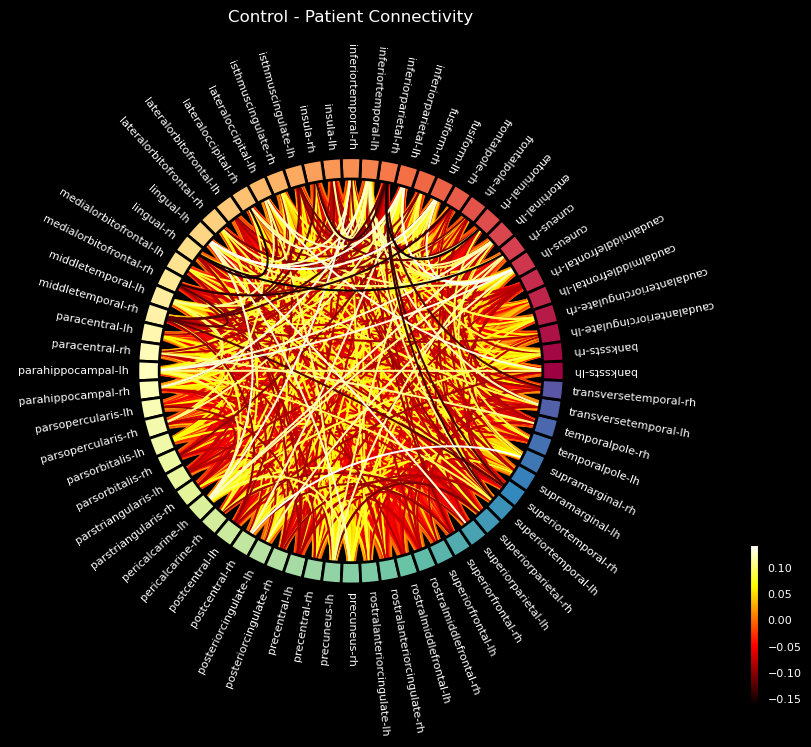

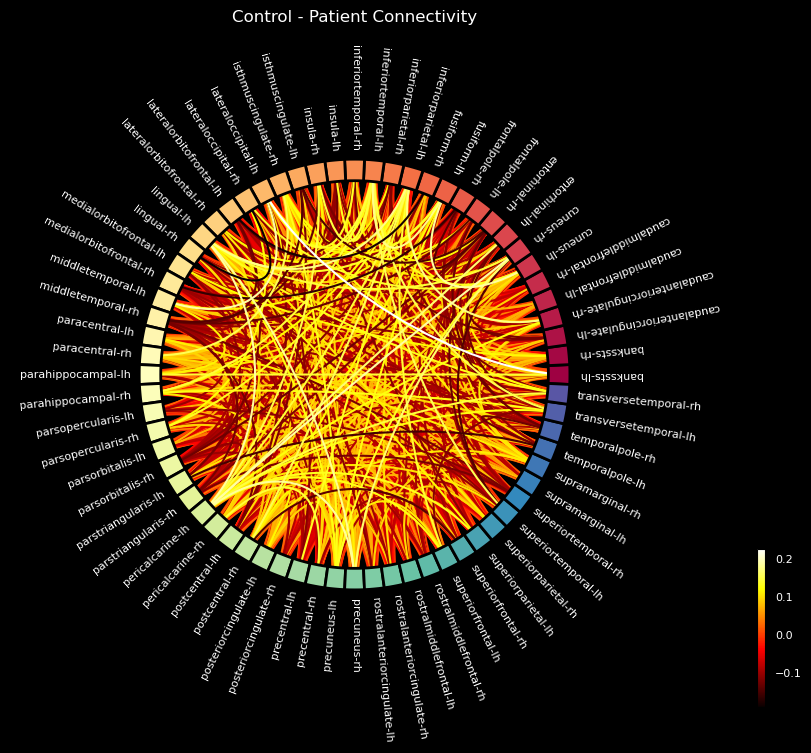

In [11]:
import numpy as np
import mne
import seaborn as sns
import matplotlib.pyplot as plt
labels_all_names = [label.name for label in labels_all]

# Set paths
subjects_dir = 'C:/Users/malann/mne_data/MNE-fsaverage-data'
subject = "fsaverage"
trans = "fsaverage"  # MNE has a built-in fsaverage transformation
src_fname = subjects_dir+'/'+subject+"/bem"+"/fsaverage-ico-4-src.fif"
bem = subjects_dir+'/'+subject+"/bem"+"/fsaverage-5120-5120-5120-bem-sol.fif"
src = mne.read_source_spaces(src_fname)

# Connectivity method
connectivity_method = 'wpli2_debiased'


def load_connectivity_data(subject_list, avoid_list, data_dir, group_name):
    """
    Loads connectivity matrices for a given group (patients or controls), avoiding specified subjects.

    Parameters:
    - subject_list: List of subject IDs
    - avoid_list: Set of subjects to exclude from analysis
    - data_dir: Directory containing connectivity matrices
    - group_name: String label for debugging (e.g., "Patients" or "Controls")

    Returns:
    - connectivity_array: Min-max Normalized Connectivity, NumPy array of shape (n_subjects, n_rois, n_rois)
    """
    connectivity_list = []
    
    for sub in subject_list:
        if sub in avoid_list:
            print(f"Skipping {sub} ({group_name}), as it's in the avoid list.")
            continue  # Skip this subject
        
        con_filename = f"{data_dir}{sub}_alpha_con_{connectivity_method}.npy"
        print(con_filename)
        try:
            connectivity_matrix = np.load(con_filename)

            min_val = np.min(connectivity_matrix)
            max_val = np.max(connectivity_matrix)
            
            # Avoid division by zero if all values are the same
            if max_val == min_val:
                print(f"Warning: Zero variance connectivity for {sub} ({group_name}), replacing with zeros.")
                normalized_array = np.zeros_like(connectivity_matrix)
            else:
                normalized_array = (connectivity_matrix - min_val) / (max_val - min_val)
            # Mirror lower triangle to upper to ensure symmetry
            i_lower = np.tril_indices_from(normalized_array, k=-1)
            normalized_array[i_lower[1], i_lower[0]] = normalized_array[i_lower[0], i_lower[1]]
            
            connectivity_list.append(normalized_array)
            print(f"Loaded {sub} ({group_name}), shape: {connectivity_matrix.shape}")  # Debugging output

        except FileNotFoundError:
            print(f"Warning: Connectivity file not found for {sub} ({group_name})")

    if not connectivity_list:
        print(f"Error: No valid connectivity data found for {group_name}!")
        return None  # Handle this case later

    return np.array(connectivity_list)


# Load connectivity data for patients and controls, excluding subjects in avoid lists
patient_data_dir = "H:/E_drive/Connectivity_Patient/"
control_data_dir = "H:/E_drive/Connectivity_Control/"

patient_connectivity = load_connectivity_data(Patient_list, Patient_avoid, patient_data_dir, "Patients")
control_connectivity = load_connectivity_data(Control_list, Control_avoid, control_data_dir, "Controls")
control_connectivity = control_connectivity[0:len(patient_connectivity)]

patient_connectivity_matched = load_connectivity_data(Patient_list_matched, Patient_avoid, patient_data_dir, "Patients")
control_connectivity_matched = load_connectivity_data(Control_list_matched, Control_avoid, control_data_dir, "Controls")
control_connectivity_matched = control_connectivity_matched[0:len(patient_connectivity_matched)]

# Ensure non-empty data before proceeding
if patient_connectivity is None or control_connectivity is None or patient_connectivity_matched is None or control_connectivity_matched is None:
    raise ValueError("One or both connectivity datasets are empty! Check file paths, subject lists, and exclusion lists.")

# Compute average connectivity matrices
patient_avg_connectivity = np.mean(patient_connectivity, axis=0)
control_avg_connectivity = np.mean(control_connectivity, axis=0)
patient_avg_connectivity_matched = np.mean(patient_connectivity_matched, axis=0)
control_avg_connectivity_matched = np.mean(control_connectivity_matched, axis=0)

print("Final Patient Average Connectivity Matrix Shape:", patient_avg_connectivity.shape)
print("Final Control Average Connectivity Matrix Shape:", control_avg_connectivity.shape)


import mne_connectivity
import matplotlib.pyplot as plt

# Plot circular connectivity plot for controls
mne_connectivity.viz.plot_connectivity_circle(
    control_avg_connectivity-patient_avg_connectivity, 
    labels_all_names, 
    title="Control - Patient Connectivity", 
    colorbar=True, 
)
plt.show()


# Plot circular connectivity plot for controls
mne_connectivity.viz.plot_connectivity_circle(
    control_avg_connectivity_matched-patient_avg_connectivity_matched, 
    labels_all_names, 
    title="Control - Patient Connectivity", 
    colorbar=True, 
)
plt.show()

In [12]:
patient_connectivity.shape

(29, 68, 68)

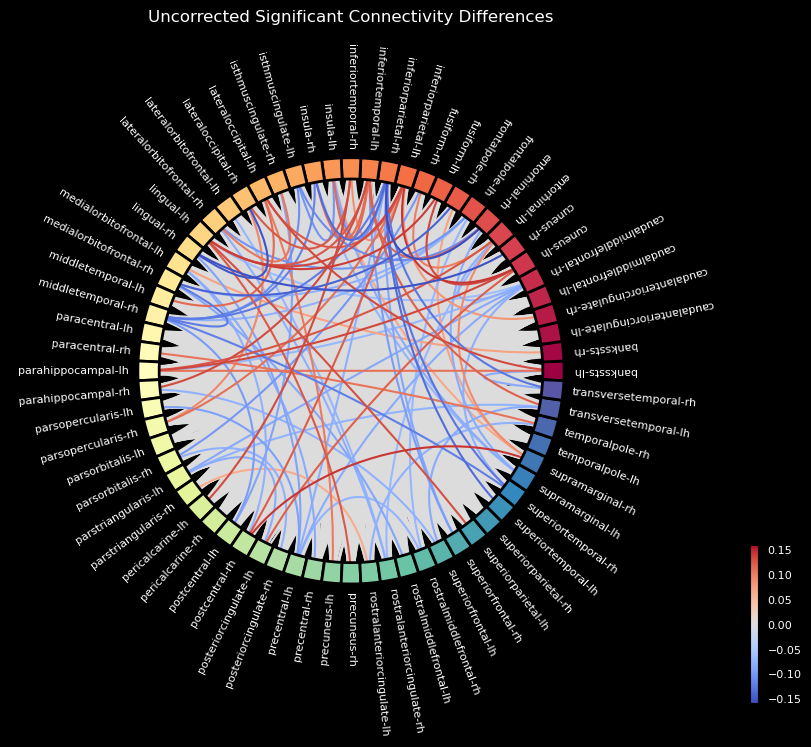

In [13]:
import numpy as np
import mne
from mne.stats import permutation_t_test
import matplotlib.pyplot as plt
import mne_connectivity
from scipy.stats import ttest_ind
from mne.stats import fdr_correction
# Assuming 'patient_connectivity' and 'control_connectivity' are already defined

# Flatten the matrices to perform group-wise statistical testing
patient_connectivity = np.array(patient_connectivity)
control_connectivity = np.array(control_connectivity)
patient_connectivity_matched = np.array(patient_connectivity_matched)
control_connectivity_matched = np.array(control_connectivity_matched)

patient_flat = patient_connectivity.reshape(patient_connectivity.shape[0], -1)  # Flatten into 2D (n_subjects, n_connections)
control_flat = control_connectivity.reshape(control_connectivity.shape[0], -1)

patient_flat_matched = patient_connectivity_matched.reshape(patient_connectivity_matched.shape[0], -1)  # Flatten into 2D (n_subjects, n_connections)
control_flat_matched = control_connectivity_matched.reshape(control_connectivity_matched.shape[0], -1)

# Perform independent t-test for each connection
t_vals, p_vals = ttest_ind(control_flat, patient_flat, axis=0, equal_var=False)
t_vals_matched, p_vals_matched = ttest_ind(control_flat_matched, patient_flat_matched, axis=0, equal_var=False)

# Apply FDR correction
_, p_vals_corrected = fdr_correction(p_vals, alpha=0.05)

# Reshape p-values
p_matrix = p_vals.reshape(patient_avg_connectivity.shape)
significant = p_matrix < 0.05

# Difference matrix
diff_matrix = control_flat.mean(axis=0).reshape(patient_avg_connectivity.shape) - patient_flat.mean(axis=0).reshape(patient_avg_connectivity.shape)
sig_diff = diff_matrix * significant

# Plot significant differences
mne_connectivity.viz.plot_connectivity_circle(
    sig_diff,
    labels_all_names,
    title="Uncorrected Significant Connectivity Differences",
    colorbar=True,
    colormap="coolwarm",
    vmin=-np.max(np.abs(sig_diff)),
    vmax=np.max(np.abs(sig_diff)),
)
plt.show()

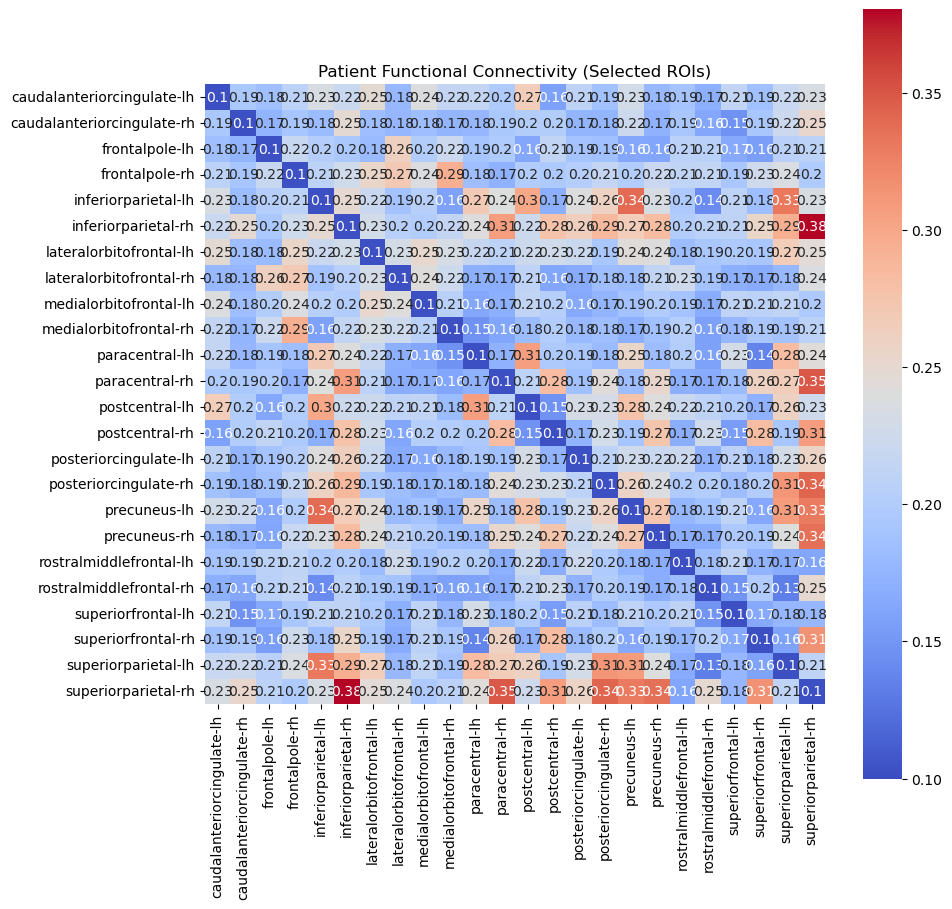

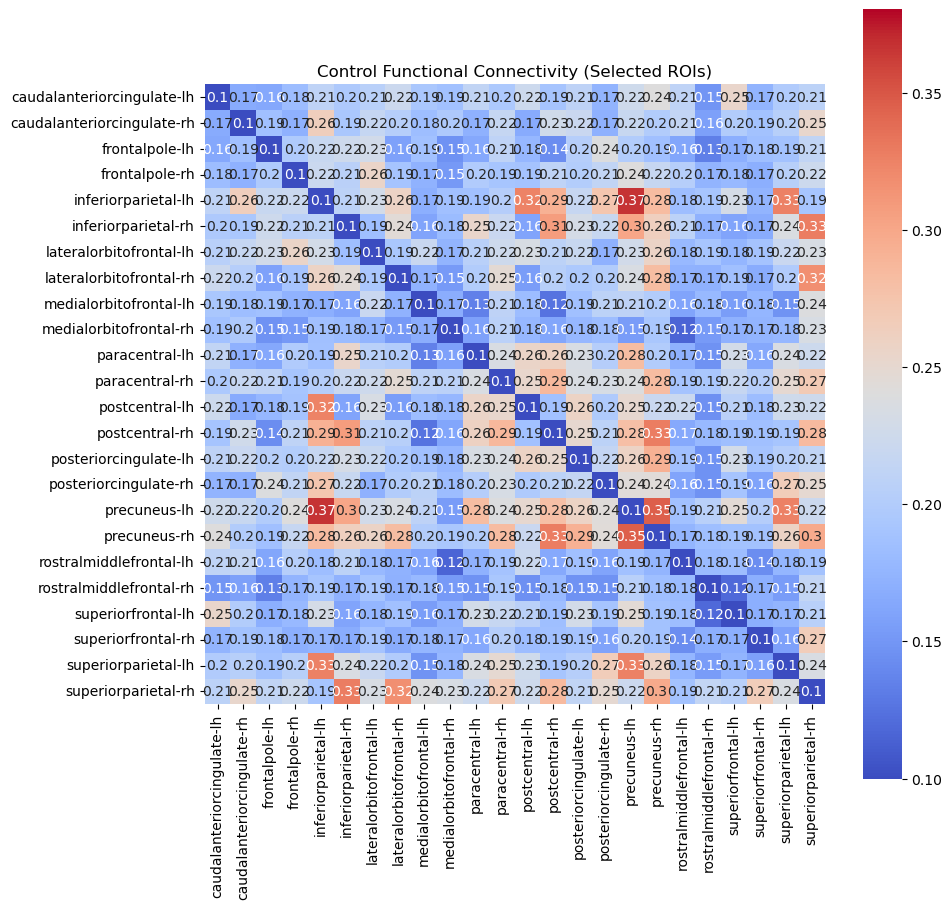

In [14]:
# Define label names for visualization
roi_labels = [ 'inferiorparietal-lh', 'inferiorparietal-rh', 'caudalanteriorcingulate-lh','caudalanteriorcingulate-rh',
    'paracentral-lh', 'postcentral-lh', 'paracentral-rh', 'postcentral-rh', 'posteriorcingulate-lh', 'posteriorcingulate-rh',
    'precuneus-lh', 'precuneus-rh', 'superiorparietal-lh', 'superiorparietal-rh',    
    'superiorfrontal-lh', 'lateralorbitofrontal-lh', 'medialorbitofrontal-lh', 'frontalpole-lh', 'rostralmiddlefrontal-lh',
    'superiorfrontal-rh', 'lateralorbitofrontal-rh', 'medialorbitofrontal-rh', 'frontalpole-rh', 'rostralmiddlefrontal-rh']

# Define mapping from ROI labels to short functional region names with hemisphere tags

# List of desired ROI names
target_rois = [
    'inferiorparietal-lh', 'inferiorparietal-rh',
    'caudalanteriorcingulate-lh', 'caudalanteriorcingulate-rh',
    'paracentral-lh', 'postcentral-lh', 'paracentral-rh', 'postcentral-rh',
    'posteriorcingulate-lh', 'posteriorcingulate-rh',
    'precuneus-lh', 'precuneus-rh',
    'superiorparietal-lh', 'superiorparietal-rh',
    'superiorfrontal-lh', 'lateralorbitofrontal-lh',
    'medialorbitofrontal-lh', 'frontalpole-lh', 'rostralmiddlefrontal-lh',
    'superiorfrontal-rh', 'lateralorbitofrontal-rh',
    'medialorbitofrontal-rh', 'frontalpole-rh', 'rostralmiddlefrontal-rh'
]

# Extract label names from labels_all
all_roi_names = [label.name for label in labels_all]

# Keep only those in target_rois, but in labels_all order
roi_labels = [roi for roi in all_roi_names if roi in target_rois]


roi_to_region = {
    'postcentral-lh': 'S1-L',
    'postcentral-rh': 'S1-R',
    'paracentral-lh': 'PCL-L',
    'paracentral-rh': 'PCL-R',
    'inferiorparietal-lh': 'IP-L',
    'inferiorparietal-rh': 'IP-R',
    'superiorparietal-lh': 'SP-L',
    'superiorparietal-rh': 'SP-R',
    'medialorbitofrontal-lh': 'mOFC-L',
    'medialorbitofrontal-rh': 'mOFC-R',
    'lateralorbitofrontal-lh': 'lOFC-L',
    'lateralorbitofrontal-rh': 'lOFC-R',
    'rostralmiddlefrontal-lh': 'DLPFC-L',
    'rostralmiddlefrontal-rh': 'DLPFC-R',
    'superiorfrontal-lh': 'SFC-L',
    'superiorfrontal-rh': 'SFC-R',
    'frontalpole-lh': 'FP-L',
    'frontalpole-rh': 'FP-R',
    'caudalanteriorcingulate-lh': 'ACC-L',
    'caudalanteriorcingulate-rh': 'ACC-R',
    'posteriorcingulate-lh': 'PCC-L',
    'posteriorcingulate-rh': 'PCC-R',
    'precuneus-lh': 'PC-L',
    'precuneus-rh': 'PC-R',
}

# Get indices of selected ROIs
roi_indices = [i for i, label in enumerate(labels_all) if label.name in roi_labels]

# Ensure selected ROIs exist in the dataset
if not roi_indices:
    raise ValueError("None of the specified ROIs were found in the annotation file!")

# Filter only if 17 controls
#if len(Control_list) == 17:
    # Define the full ROI names you want to keep

#    roi_labels = [roi for roi in roi_labels if roi in target_full_roi_names]
#    roi_indices = [i for i, label in enumerate(labels_all) if label.name in roi_labels]

# Extract submatrix for selected ROIs
patient_submatrix = patient_avg_connectivity[np.ix_(roi_indices, roi_indices)]
control_submatrix = control_avg_connectivity[np.ix_(roi_indices, roi_indices)]

patient_submatrix_matched = patient_avg_connectivity_matched[np.ix_(roi_indices, roi_indices)]
control_submatrix_matched = control_avg_connectivity_matched[np.ix_(roi_indices, roi_indices)]

# Determine shared color scale
vmin = min(patient_submatrix.min(), control_submatrix.min())
vmax = max(patient_submatrix.max(), control_submatrix.max())

# Function to plot connectivity heatmaps
def plot_connectivity(matrix, title, vmin, vmax):
    plt.figure(figsize=(10, 10))
    sns.heatmap(matrix, annot=True, cmap='coolwarm', xticklabels=roi_labels, yticklabels=roi_labels, square=True, vmin=vmin, vmax=vmax)
    plt.title(title)
    plt.show()

# Plot connectivity matrices with the same color scale
plot_connectivity(patient_submatrix, 'Patient Functional Connectivity (Selected ROIs)', vmin, vmax)
plot_connectivity(control_submatrix, 'Control Functional Connectivity (Selected ROIs)', vmin, vmax)


In [15]:
import numpy as np
import pandas as pd
from itertools import combinations

# Sample shape: (n_subjects, n_rois, n_rois)
n_subjects = 29
# Extract submatrices for each subject
patient_submatrices = patient_connectivity[:, roi_indices][:, :, roi_indices]  # shape (n_patients, n_rois, n_rois)
control_submatrices = control_connectivity[:, roi_indices][:, :, roi_indices]  # shape (n_controls, n_rois, n_rois)

patient_submatrices_matched = patient_connectivity_matched[:, roi_indices][:, :, roi_indices]  # shape (n_patients, n_rois, n_rois)
control_submatrices_matched = control_connectivity_matched[:, roi_indices][:, :, roi_indices]  # shape (n_controls, n_rois, n_rois)

roi_names = roi_labels  # list of 17 labels

# patient_data and control_data: shape = (29, 17, 17)
def matrix_to_long(data_matrix, group_label):
    subjects = []
    groups = []
    roi1_list = []
    roi2_list = []
    values = []

    for subj_idx in range(data_matrix.shape[0]):
        for i in range(len(roi_labels)):
            for j in range(i+1, len(roi_labels)):  # upper triangle only
                subjects.append(f"{group_label}_{subj_idx:02d}")
                groups.append(group_label)
                roi1_list.append(roi_labels[i])
                roi2_list.append(roi_labels[j])
                values.append(data_matrix[subj_idx, i, j])

    return pd.DataFrame({
        'subject': subjects,
        'group': groups,
        'ROI_1': roi1_list,
        'ROI_2': roi2_list,
        'connectivity': values
    })

# Create dataframes
df_patients = matrix_to_long(patient_submatrices, 'patient')
df_controls = matrix_to_long(control_submatrices, 'control')

df_patients_matched = matrix_to_long(patient_submatrices_matched, 'patient')
df_controls_matched = matrix_to_long(control_submatrices_matched, 'control')

# Combine
df_all = pd.concat([df_patients, df_controls], ignore_index=True)
df_all_matched = pd.concat([df_patients_matched, df_controls_matched], ignore_index=True)


import numpy as np
import pandas as pd
import pingouin as pg

# Assuming data preparation (df_all, roi_pairs, etc.) is already done as in the previous steps.

def compute_bayes_factor(x, y):
    """Compute Bayes Factor using pingouin's t-test with Bayes Factor."""
    # Perform t-test and compute BF10 directly
    ttest_res = pg.ttest(x=x, y=y, paired=False, correction=False, alternative='two-sided')
    bf10 = ttest_res['BF10'].values[0]  # Get Bayes Factor (BF10)
    t_stat = ttest_res['T'].values[0]   # Get T-statistic
    p_val = ttest_res['p-val'].values[0]  # Get p-value
    return bf10, t_stat, p_val

# Loop through ROI pairs and compute BF
bf_results = []
bf_results_matched = []

roi_pairs = df_all[['ROI_1', 'ROI_2']].drop_duplicates().values

for roi1, roi2 in roi_pairs:
    subset = df_all[(df_all['ROI_1'] == roi1) & (df_all['ROI_2'] == roi2)]
    subset_matched = df_all_matched[(df_all_matched['ROI_1'] == roi1) & (df_all_matched['ROI_2'] == roi2)]
    
    x = subset[subset['group'] == 'patient']['connectivity'].values
    y = subset[subset['group'] == 'control']['connectivity'].values
    x_matched = subset_matched[subset_matched['group'] == 'patient']['connectivity'].values
    y_matched = subset_matched[subset_matched['group'] == 'control']['connectivity'].values
    
    if len(x) > 1 and len(y) > 1:
        bf, t_val, p_val = compute_bayes_factor(x, y)
        bf_results.append({
            'ROI_1': roi1,
            'ROI_2': roi2,
            'BF10': bf,
            'T': t_val,
            'p-val': p_val
        })
    if len(x_matched) > 1 and len(y_matched) > 1:
        bf_matched, t_val_matched, p_val_matched = compute_bayes_factor(x_matched, y_matched)
        bf_results_matched.append({
            'ROI_1': roi1,
            'ROI_2': roi2,
            'BF10': bf_matched,
            'T': t_val_matched,
            'p-val': p_val_matched
        })
# Convert results to DataFrame
df_bf = pd.DataFrame(bf_results)
df_bf_matched = pd.DataFrame(bf_results_matched)

df_bf
# Add a new column to determine which group has greater connectivity
df_bf['greater_group'] = np.where(df_bf['T'] > 0, 'patient', 'control')
df_bf_matched['greater_group'] = np.where(df_bf_matched['T'] > 0, 'patient', 'control')

# Display the updated DataFrame with the greater group column
df_bf

# Convert 'BF10' to numeric, coercing errors to NaN if necessary
df_bf['BF10'] = pd.to_numeric(df_bf['BF10'], errors='coerce')
df_bf_matched['BF10'] = pd.to_numeric(df_bf_matched['BF10'], errors='coerce')


if len(Control_list_matched)==20:
   
    # Define the full ROI names you want to keep
    target_full_roi_names = [
        'frontalpole-lh', 'frontalpole-rh',
        'inferiorparietal-lh',
        'lateralorbitofrontal-rh',
        'medialorbitofrontal-lh', 'medialorbitofrontal-rh',
        'postcentral-rh',
        'rostralmiddlefrontal-lh'
    ]
    
    # Now filter df_bf where ROI_1 or ROI_2 is in the target list
    filtered_df_bf = df_bf_matched[
        (df_bf_matched['ROI_1'].isin(target_full_roi_names)) &
        (df_bf_matched['ROI_2'].isin(target_full_roi_names))
    ]

    
    # siginficant ROI 
    con_roi = list(filtered_df_bf['ROI_1']) + list(filtered_df_bf['ROI_2'])
    # Remove duplicates
    con_roi = list(set(con_roi))


else:      
    # Now filter out ROI pairs with BF10 > 3
    filtered_df_bf = df_bf_matched[df_bf_matched['BF10'] >= 3]
    
    # siginficant ROI 
    con_roi = list(filtered_df_bf['ROI_1']) + list(filtered_df_bf['ROI_2'])
    # Remove duplicates
    con_roi = list(set(con_roi))
    
    # Optional: sort the list nicely
    con_roi.sort()

# Display the filtered results
filtered_df_bf


,ROI_1,ROI_2,BF10,T,p-val,greater_group
45,frontalpole-lh,frontalpole-rh,0.471,1.032220,0.308494,patient
46,frontalpole-lh,inferiorparietal-lh,0.309,0.038526,0.969470,patient
49,frontalpole-lh,lateralorbitofrontal-rh,3.566,2.536261,0.015435,patient
50,frontalpole-lh,medialorbitofrontal-lh,0.550,1.209728,0.233856,patient
51,frontalpole-lh,medialorbitofrontal-rh,1.326,1.938035,0.060075,patient
55,frontalpole-lh,postcentral-rh,0.383,0.736147,0.466161,patient
60,frontalpole-lh,rostralmiddlefrontal-lh,1.012,1.744331,0.089186,patient
66,frontalpole-rh,inferiorparietal-lh,0.503,1.109999,0.273974,patient
69,frontalpole-rh,lateralorbitofrontal-rh,0.926,1.676575,0.101835,patient
70,frontalpole-rh,medialorbitofrontal-lh,0.542,1.192560,0.240436,patient


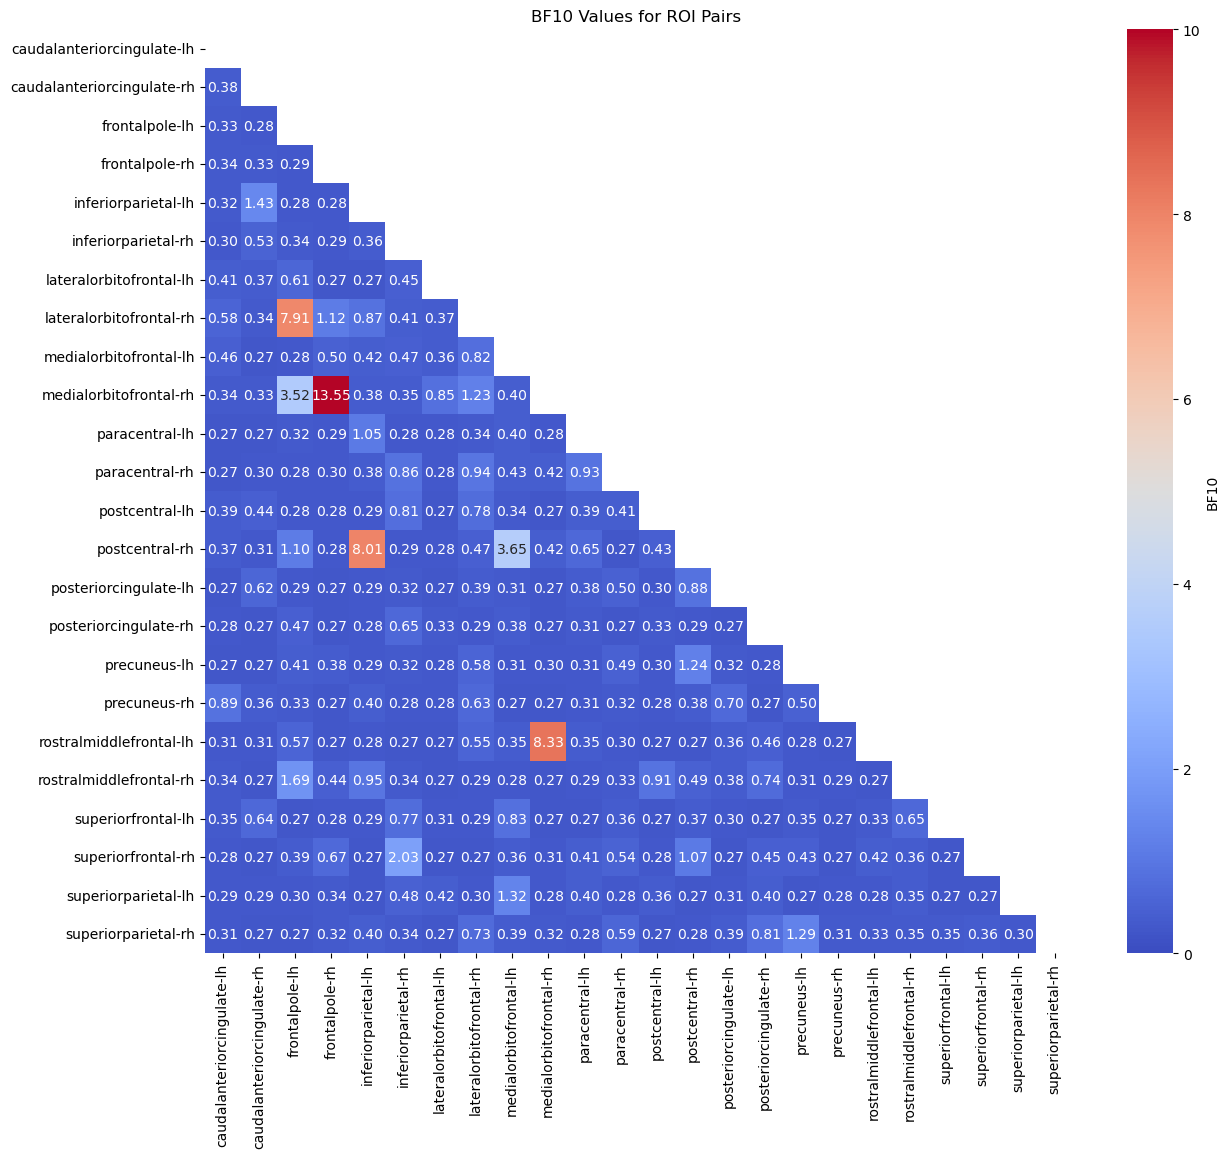

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a matrix of BF values
bf_matrix = np.zeros((len(roi_labels), len(roi_labels)))
bf_matrix_matched = np.zeros((len(roi_labels), len(roi_labels)))

# Fill the matrix with the BF values from df_bf
for index, row in df_bf.iterrows():
    roi1_idx = roi_labels.index(row['ROI_1'])
    roi2_idx = roi_labels.index(row['ROI_2'])
    bf_matrix[roi1_idx, roi2_idx] = row['BF10']
    bf_matrix[roi2_idx, roi1_idx] = row['BF10']  # Since the matrix is symmetric

for index, row in df_bf_matched.iterrows():
    roi1_idx = roi_labels.index(row['ROI_1'])
    roi2_idx = roi_labels.index(row['ROI_2'])
    bf_matrix_matched[roi1_idx, roi2_idx] = row['BF10']
    bf_matrix_matched[roi2_idx, roi1_idx] = row['BF10']  # Since the matrix is symmetric

# Mask the upper triangle of the matrix
mask = np.triu(np.ones_like(bf_matrix, dtype=bool))

# Create the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(bf_matrix, annot=True, cmap="coolwarm", fmt=".2f", mask=mask,
            xticklabels=roi_labels, yticklabels=roi_labels, cbar_kws={'label': 'BF10'},
            vmin=0, vmax=10)  # Adjust vmin and vmax as needed to control color scaling
plt.title("BF10 Values for ROI Pairs ")
plt.show()


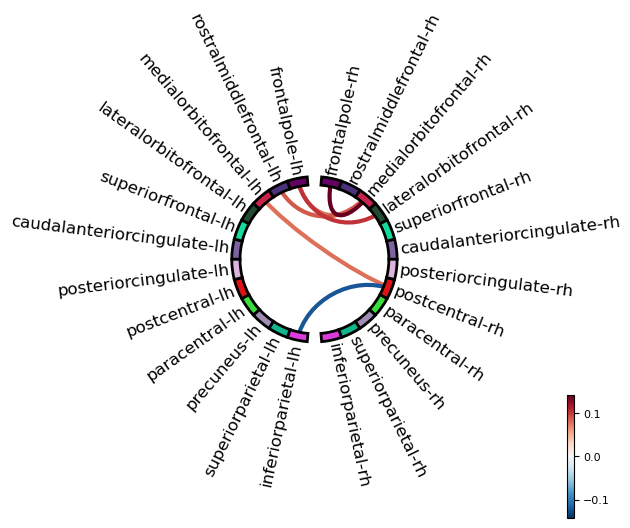

In [17]:
from mne_connectivity.viz import plot_connectivity_circle
import matplotlib.pyplot as plt

# Compute mean matrices and difference
mean_patient = np.mean(patient_submatrices, axis=0)
mean_control = np.mean(control_submatrices, axis=0)
difference_matrix = mean_patient - mean_control


# Compute mean matrices and difference
mean_patient_matched = np.mean(patient_submatrices_matched, axis=0)
mean_control_matched = np.mean(control_submatrices_matched, axis=0)
difference_matrix_matched = mean_patient_matched - mean_control_matched

n_rois = len(roi_indices)

# Only keep significant connections (lower triangle, symmetric)
significant_connections_diff = np.full_like(difference_matrix, np.nan)
for i in range(n_rois):
    for j in range(i):
        if bf_matrix[i, j] > 3:
            val = difference_matrix[i, j]
            significant_connections_diff[i, j] = val
            significant_connections_diff[j, i] = val

# Only keep significant connections (lower triangle, symmetric)
significant_connections_diff_matched = np.full_like(difference_matrix_matched, np.nan)
for i in range(n_rois):
    for j in range(i):
        if bf_matrix_matched[i, j] > 3:
            val = difference_matrix_matched[i, j]
            significant_connections_diff_matched[i, j] = val
            significant_connections_diff_matched[j, i] = val

import numpy as np

# Get valid indices where the row is not all NaN
valid_idx = ~np.all(np.isnan(significant_connections_diff), axis=1)

# Filter the matrix
significant_connections_diff1 = significant_connections_diff[valid_idx][:, valid_idx]

cleaned_roi_labels = [roi_labels[i] for i, valid in enumerate(valid_idx) if valid]


# Set node colors
node_colors = ['#555555'] * len(roi_labels)
# Create a mapping from label name to color
label_color_dict = {label.name: label.color for label in labels_all}

# Ensure correct color order matching roi_labels
node_colors = [label_color_dict.get(name, 'gray') for name in roi_labels]


# First, we reorder the labels based on their location in the left hemi
label_names = roi_labels

lh_labels = [name for name in label_names if name.endswith("lh")]

# Get the y-location of the label
label_ypos = list()
for name in lh_labels:
    idx = labels_all_names.index(name)
    ypos = np.mean(labels_all[idx].pos[:, 1])
    label_ypos.append(ypos)

# Reorder the labels based on their location
lh_labels = [label for (yp, label) in sorted(zip(label_ypos, lh_labels))]

# For the right hemi
rh_labels = [name for name in label_names if name.endswith("rh")]

label_ypos_rh = list()
for name in rh_labels:
    idx = labels_all_names.index(name)
    ypos = np.mean(labels_all[idx].pos[:, 1])
    label_ypos_rh.append(ypos)

# Reorder the labels based on their location
rh_labels = [label for (yp, label) in sorted(zip(label_ypos_rh, rh_labels))]

# Save the plot order and create a circular layout
node_order = list()
node_order.extend(lh_labels[::-1])  # reverse the order
node_order.extend(rh_labels)

node_angles = circular_layout(
    label_names, node_order, start_pos=90, group_boundaries=[0, len(label_names) / 2]
)

non_nan_vals = significant_connections_diff[~np.isnan(significant_connections_diff)]
vlim = np.max(np.abs(non_nan_vals))

fig, ax = plt.subplots(figsize=(8, 8), facecolor="white", subplot_kw=dict(polar=True))

# Plot and unpack the returned tuple
fig, ax = plot_connectivity_circle(
    significant_connections_diff,
    node_names=roi_labels, facecolor='white', textcolor='black',
    #title='Significant Connectivity Differences (Controls vs Patients)',
    colormap='RdBu_r',
    vmin=-vlim,
    vmax=+vlim,
    node_angles=node_angles,
    node_colors=node_colors,
    fontsize_names=12,
    linewidth=3,colorbar_size=0.2,
    padding=20.0,
    ax=ax,
)

# Set white background
fig.tight_layout()
plt.show()


In [29]:
df_bf_matched

,ROI_1,ROI_2,BF10,T,p-val,greater_group
45,frontalpole-lh,frontalpole-rh,0.471,1.032220,0.308494,patient
46,frontalpole-lh,inferiorparietal-lh,0.309,0.038526,0.969470,patient
49,frontalpole-lh,lateralorbitofrontal-rh,3.566,2.536261,0.015435,patient
50,frontalpole-lh,medialorbitofrontal-lh,0.550,1.209728,0.233856,patient
51,frontalpole-lh,medialorbitofrontal-rh,1.326,1.938035,0.060075,patient
55,frontalpole-lh,postcentral-rh,0.383,0.736147,0.466161,patient
60,frontalpole-lh,rostralmiddlefrontal-lh,1.012,1.744331,0.089186,patient
66,frontalpole-rh,inferiorparietal-lh,0.503,1.109999,0.273974,patient
69,frontalpole-rh,lateralorbitofrontal-rh,0.926,1.676575,0.101835,patient
70,frontalpole-rh,medialorbitofrontal-lh,0.542,1.192560,0.240436,patient


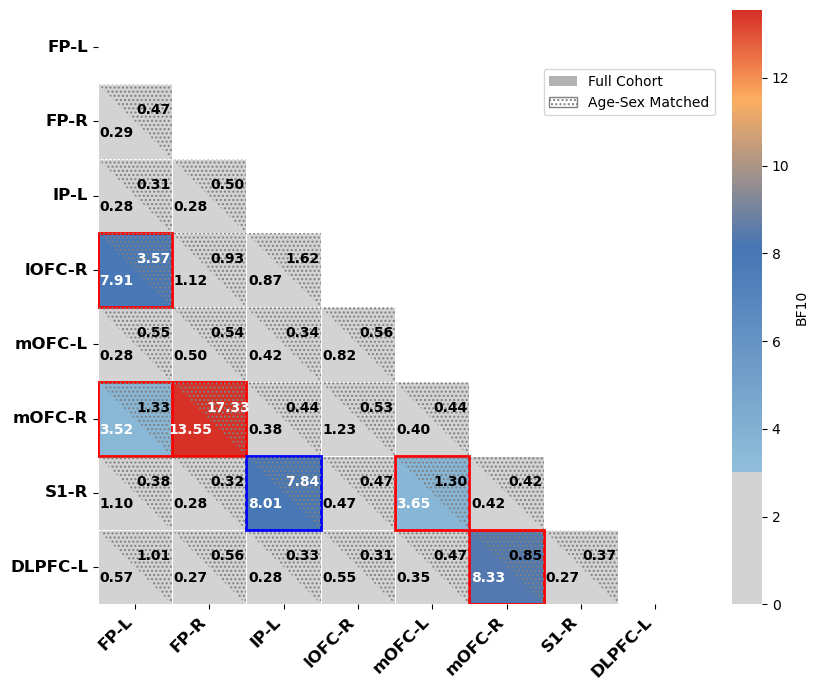

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import numpy as np

# Filter only if 17 controls
if len(Control_list_matched) == 20:
    df_bf_matched = df_bf_matched[
        df_bf_matched['ROI_1'].isin(target_full_roi_names) &
        df_bf_matched['ROI_2'].isin(target_full_roi_names)
    ]
    roi_labels_matched = [roi for roi in roi_labels if roi in target_full_roi_names]

# --- Full matrix ---
n = len(roi_labels)
bf_matrix = np.zeros((n, n))
group_matrix = np.empty((n, n), dtype=object)

for _, row in df_bf.iterrows():
    i = roi_labels.index(row['ROI_1'])
    j = roi_labels.index(row['ROI_2'])
    bf_matrix[i, j] = row['BF10']
    bf_matrix[j, i] = row['BF10']
    group_matrix[i, j] = row['greater_group']
    group_matrix[j, i] = row['greater_group']

# --- Matched matrix ---
bf_matrix_matched = np.zeros((n, n))
for _, row in df_bf_matched.iterrows():
    if row['ROI_1'] in roi_labels and row['ROI_2'] in roi_labels:
        i = roi_labels.index(row['ROI_1'])
        j = roi_labels.index(row['ROI_2'])
        bf_matrix_matched[i, j] = row['BF10']
        bf_matrix_matched[j, i] = row['BF10']

# --- Filter ROIs ---
threshold = 3
bf_threshold = 3
if len(Control_list) == 20:
    bf_threshold = 0

keep_indices = [i for i in range(n) if np.any(bf_matrix[i, :] > bf_threshold)]
filtered_bf = bf_matrix[np.ix_(keep_indices, keep_indices)]
filtered_bf_matched = bf_matrix_matched[np.ix_(keep_indices, keep_indices)]
filtered_group = group_matrix[np.ix_(keep_indices, keep_indices)]
short_labels = [roi_to_region[roi_labels[i]] for i in keep_indices]

# --- Heatmap ---
mask = ~np.tril(np.ones_like(filtered_bf, dtype=bool), k=-1)

colors_list = [
    (0.0, 'lightgray'),
    (threshold / np.nanmax(filtered_bf), 'lightgray'),
    (threshold / np.nanmax(filtered_bf) + 1e-6, '#440154'),
    (1.0, '#fde725')
]
cmap = mcolors.LinearSegmentedColormap.from_list('gray_viridis', colors_list)

vmax = np.nanmax(filtered_bf)

colors_list = [
    (0.0, 'lightgray'),                        # below threshold
    (threshold / vmax, 'lightgray'),           # threshold
    (threshold / vmax + 1e-6, '#1f77b4'),      # dark blue
    (0.6, '#ff7f0e'),                          # orange-ish/red
    (1.0, '#d62728')                            # strong red
]

cmap = mcolors.LinearSegmentedColormap.from_list('gray_blue_red', colors_list)

vmax = np.nanmax(filtered_bf)
# Publication-ready colormap: gray below threshold, blue (cool) to red (warm)
colors_list = [
    (0.0, 'lightgray'),                          # below threshold
    (threshold / vmax, 'lightgray'),             # threshold
    (threshold / vmax + 1e-6, '#91bfdb'),        # light blue
    (0.6, '#4575b4'),                            # medium blue
    (0.85, '#fdae61'),                           # orange
    (1.0, '#d73027')                             # strong red
]
cmap = mcolors.LinearSegmentedColormap.from_list('gray_coolwarm', colors_list)

# ... (all your setup code up to the heatmap call unchanged) ...

plt.figure(figsize=(9, 7))
ax = sns.heatmap(filtered_bf, annot=False, fmt=".2f", cmap=cmap,
                 vmin=0, vmax=np.nanmax(filtered_bf),
                 cbar_kws={'label': 'BF10'}, xticklabels=short_labels, yticklabels=short_labels,
                 square=True, linewidths=0.5, mask=mask)

# Overlay colored borders for connections with BF10 > threshold
for i in range(filtered_bf.shape[0]):
    for j in range(filtered_bf.shape[1]):
        if i > j and filtered_bf[i, j] > threshold:
            group = filtered_group[i, j]
            color = 'red' if group == 'patient' else 'blue'
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor=color, linewidth=2, zorder=5))


# --- Annotate both full and matched values and add matched hatch on the correct half ---
for i in range(filtered_bf.shape[0]):
    for j in range(filtered_bf.shape[1]):
        if i > j:  # lower triangle only
            x, y = j, i
            val_full = filtered_bf[i, j]
            val_matched = filtered_bf_matched[i, j]

            # Font colors
            color_full = 'white' if val_full > 3 else 'black'
            color_matched = 'white' if val_matched > 3 else 'black'

            # Full (original) — lower-left
            ax.text(x + 0.25, y + 0.65, f"{val_full:.2f}",
                    ha='center', va='center', fontsize=10,
                    fontweight='bold', color=color_full, zorder=10)

            # Matched — upper-right
            ax.text(x + 0.75, y + 0.35, f"{val_matched:.2f}",
                    ha='center', va='center', fontsize=10,
                    fontweight='bold', color=color_matched, zorder=11)

            # Add dotted green hatch overlay for matched half — top-right triangle
            tri = mpatches.Polygon(
                [[x, y], [x + 1, y], [x + 1, y + 1]],
                closed=True,
                facecolor='none',        # keep background visible
                edgecolor='gray',       # green hatch
                hatch='....',              # dotted
                linewidth=0.0,
                alpha=1,
                zorder=6
            )
            ax.add_patch(tri)

# Legend (including green dotted patch sample)
dot_patch = mpatches.Patch(facecolor='none', hatch='....',
                           edgecolor='gray', label='Age-Sex Matched', alpha=1)

full_patch = mpatches.Patch(facecolor='gray', edgecolor='none', label='Full Cohort', alpha=0.6)

plt.legend(handles=[red_patch, blue_patch, full_patch, dot_patch],
           bbox_to_anchor=(.75, 0.9), loc='upper left', borderaxespad=0.)


# Formatting
plt.xticks(rotation=45, ha="right", fontsize=12, fontweight='bold')
plt.yticks(rotation=0, fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


Connectivity on Brain Surface MAP

In [23]:
def plot_surface_connectivity(connectivity, labels_all, label_names, subject, subjects_dir,
                              threshold=0.5, view='dorsal', cmap_name='viridis', dot_color='red',
                              title="", line_width=5.0, mode='2d', colorbar=True,
                              dot_size=0.5, brain_kwargs=None, figsize=(9, 5), cbar_position='right',
                              cbar_title='Connectivity', vmin=None, vmax=None):  
    if brain_kwargs is None:
        brain_kwargs = {}

    alpha = brain_kwargs.pop('alpha', 0.2)
    hemi = brain_kwargs.pop('hemi', 'both')

    coords_lh, _ = mne.read_surface(f"{subjects_dir}/{subject}/surf/lh.pial")
    coords_rh, _ = mne.read_surface(f"{subjects_dir}/{subject}/surf/rh.pial")

    centroids = {}
    for label in labels_all:
        if label.name in label_names:
            verts = coords_lh[label.vertices] if label.hemi == 'lh' else coords_rh[label.vertices]
            centroids[label.name] = verts.mean(axis=0)

    valid_labels = [lbl for lbl in label_names if lbl in centroids]
    coords = [centroids[lbl] for lbl in valid_labels]

    brain = mne.viz.Brain(subject=subject, subjects_dir=subjects_dir,
                  hemi=hemi, views=view, alpha=alpha, **brain_kwargs)

    lh_coords = [centroids[label] for label in valid_labels
                 if any(lbl.name == label and lbl.hemi == 'lh' for lbl in labels_all)]
    rh_coords = [centroids[label] for label in valid_labels
                 if any(lbl.name == label and lbl.hemi == 'rh' for lbl in labels_all)]

    if lh_coords:
        brain.add_foci(np.array(lh_coords), hemi='lh', coords_as_verts=False,
                       scale_factor=dot_size, color=dot_color)
    if rh_coords:
        brain.add_foci(np.array(rh_coords), hemi='rh', coords_as_verts=False,
                       scale_factor=dot_size, color=dot_color)

    plotter = brain.plotter

    # Use user-provided vmin/vmax or fallback to defaults
    data_vmax = np.nanmax(connectivity)
    data_vmin = np.nanmin(connectivity[np.triu_indices_from(connectivity, k=1)])  # ignore diagonal

    norm = plt.Normalize(
        vmin if vmin is not None else threshold,
        vmax if vmax is not None else data_vmax
    )
    cmap = plt.get_cmap(cmap_name)

    for i, lbl1 in enumerate(valid_labels):
        for j, lbl2 in enumerate(valid_labels):
            if i < j and not np.isnan(connectivity[i, j]) and connectivity[i, j] >= threshold:
                strength = connectivity[i, j]
                color = cmap(norm(strength))[:3]
                line_coords = np.vstack([centroids[lbl1], centroids[lbl2]])
                plotter.add_lines(line_coords, color=color, width=line_width)

    if mode == '3d':
        return brain

    screenshot = brain.screenshot()
    brain.close()
    nonwhite_pix = (screenshot != 255).any(-1)
    cropped = screenshot[nonwhite_pix.any(1)][:, nonwhite_pix.any(0)]

    fig = plt.figure(figsize=figsize)
    gs = matplotlib.gridspec.GridSpec(1, 2, width_ratios=[20, 1])

    ax_img = fig.add_subplot(gs[0])
    ax_img.imshow(cropped)
    ax_img.axis('off')

    if colorbar:
        ax_cb = fig.add_subplot(gs[1])
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        cb = fig.colorbar(sm, cax=ax_cb)
        cb.set_label(cbar_title, rotation=270, labelpad=15)

    plt.subplots_adjust(wspace=0.01, hspace=0.1)
    fig.suptitle(title, fontsize=14)
    plt.show()


In [24]:
significant_connections_diff1.shape

(8, 8)

In [26]:
filtered_bf_matrix = significant_connections_diff1*(filtered_bf>3)
filtered_bf_matrix

array([[        nan,         nan,         nan,  0.103394  ,         nan,
         0.07598357,         nan,         nan],
       [        nan,         nan,         nan,         nan,         nan,
         0.14239373,         nan,         nan],
       [        nan,         nan,         nan,         nan,         nan,
                nan, -0.12135657,         nan],
       [ 0.103394  ,         nan,         nan,         nan,         nan,
                nan,         nan,         nan],
       [        nan,         nan,         nan,         nan,         nan,
                nan,  0.07803042,         nan],
       [ 0.07598357,  0.14239373,         nan,         nan,         nan,
                nan,         nan,  0.08732359],
       [        nan,         nan, -0.12135657,         nan,  0.07803042,
                nan,         nan,         nan],
       [        nan,         nan,         nan,         nan,         nan,
         0.08732359,         nan,         nan]])

In [27]:
# connectivity: 2D numpy array (N x N)
# label_names: list of label.name strings (length N)
# labels_all: full label list from mne.read_labels_from_annot
import matplotlib

plot_surface_connectivity(
    connectivity=filtered_bf_matrix, #filtered_bf_matrix, significant_connections_diff1
    labels_all=labels_all,
    dot_color='grey',
    cmap_name='seismic',
    colorbar=False,
    view=['dorsal'],
    label_names=filtered_roi_labels,
    subject='fsaverage',
    subjects_dir=subjects_dir,
    threshold=-3,
    title='',
    line_width=15,
    mode = '2d',
    dot_size = 0.8,
    brain_kwargs = {'alpha':0.2, 'cortex':'low_contrast', 'background':'white' },
    cbar_title = 'Connectivity (Patient -Control)',
    vmin = -0.2, vmax=0.2,
)


NameError: name 'filtered_roi_labels' is not defined

Corrleation with Pain ratings

In [ ]:
labels_all

In [ ]:
filtered_roi_labels
# Assuming roi_names is in the same order as used in the 68x68 connectivity
roi_indices_to_keep = [labels_all_names.index(label) for label in filtered_roi_labels]
# Select only the desired ROIs from the full connectivity matrix
filtered_connectivity = patient_connectivity[:, roi_indices_to_keep, :][:, :, roi_indices_to_keep]
filtered_connectivity.shape

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from tqdm import tqdm
from statsmodels.stats.multitest import multipletests

Patient_list = ['PASP001', 'PASP002','PASP003', 'PASP004', 'PASP005', 
                'PASP006','PASP007', 'PASP008', 'PASP009', 'PASP010', 'PASP011',
                'PASP012', 'PASP013', 'PASP014','PASP015', 'PASP016',
                'PASP017', 'PASP018','PASP019', 'PASP020', 'PASP021',
                'PASP022', 'PASP023', 'PASP025', 'PASP026', 'PASP027',
                'PASP028', 'PASP029', 'PASP030', 'PASP031', 'PASP032',
                'PASP033']

n_subjects, n_rois, _ = filtered_connectivity.shape

# Flatten the upper triangle of each subject's connectivity matrix
data_list = []
roi_pairs = []

# Define ROI pair names (upper triangle only)
for i in range(n_rois):
    for j in range(i + 1, n_rois):
        roi_pairs.append(f"{i}_{j}")

# For each subject, extract upper triangle values
for idx, subj in enumerate(Patient_list[:n_subjects]):
    upper_tri = []
    for i in range(n_rois):
        for j in range(i + 1, n_rois):
            upper_tri.append(filtered_connectivity[idx, i, j])
    data_list.append([subj] + upper_tri)

# Create column names
columns = ['subject_id'] + roi_pairs

# Create DataFrame
conn_df = pd.DataFrame(data_list, columns=columns)

beh_data = pd.read_excel("E:/gifty_from_BS/MATLAB_codes/2024-06-19ParticipantReportedMeasuresv2.xlsx", sheet_name="PASP")
# Filter patient data
# Select additional columns from beh_data
additional_columns = beh_data.iloc[:, 14:51]  # Adjust based on your actual column index range

# Merge patient data with behavioral data including more columns
merged_data = conn_df.merge(
    beh_data[['id', 'Pain Rating', 'age', 'female','Months since origin']],
    left_on='subject_id', right_on='id', 
    how='left'
)

# Remove specific subjects
subjects_to_remove = ['PASP009']
merged_data = merged_data[~merged_data['subject_id'].isin(subjects_to_remove)]

# Remove rows where 'Pain Rating' is NaN
merged_data = merged_data.dropna()

# Ensure each subject has only one Pain Rating
unique_pain_ratings = merged_data.drop_duplicates(subset=['subject_id'])[['subject_id', 'Pain Rating', 'age', 'female', 'Months since origin']]

len(unique_pain_ratings)

In [ ]:
from statsmodels.api import OLS, add_constant

t_vals = []
p_vals = []
betas = []
pair_names = []

# For each ROI pair
for pair in roi_pairs:
    y = merged_data[pair].astype(float)
    X = merged_data[['Pain Rating', 'age', 'female', 'Months since origin']].astype(float)
    X = add_constant(X)

    model = OLS(y, X).fit()
    if 'Pain Rating' in model.params:
        betas.append(model.params['Pain Rating'])
        t_vals.append(model.tvalues['Pain Rating'])
        p_vals.append(model.pvalues['Pain Rating'])
        pair_names.append(pair)
# Correct p-values
rej, p_corrected, _, _ = multipletests(p_vals, method='fdr_bh')

# Create a summary DataFrame
results_df = pd.DataFrame({
    'ROI_Pair': pair_names,
    'Beta': betas,
    't_value': t_vals,
    'p_value': p_vals,
    'p_fdr': p_corrected,
    'significant': rej
})

# Sort by p_fdr
results_df = results_df.sort_values('p_fdr')


In [ ]:
p_vals

In [ ]:
roi_name_map = {f"{i}": labels_all_names[i] for i in range(68)}
results_df['ROI_1'] = results_df['ROI_Pair'].apply(lambda x: roi_name_map[x.split('_')[0]])
results_df['ROI_2'] = results_df['ROI_Pair'].apply(lambda x: roi_name_map[x.split('_')[1]])
significant_edges = results_df[results_df['significant']]


In [ ]:
significant_edges

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests

# List to store results
results_list = []

scores = ['Pain Rating', 'bai', 'bdi']  # Extend if needed

for param in parameters:
    for score in scores:
        print(f"\nRunning univariate analysis for {param} with {score}...")

        # Reshape Y: Each ROI has one value per subject
        Y = merged_data.pivot(index='subject_id', columns='roi', values=param)
        roi_names = Y.columns  # Store ROI names

        # Ensure Y and behavioral data are aligned by subject_id
        Y = Y.loc[unique_pain_ratings['subject_id']]  # Reorder subjects
        X = unique_pain_ratings.set_index('subject_id').loc[Y.index, [score, 'age']].values  # Predictor variables

        # Convert Y to NumPy array after indexing
        Y = Y.values

        np.random.seed(42)
        N_subjects, N_rois = Y.shape

        # Initialize arrays to store results
        betas = np.zeros(N_rois)
        p_values = np.zeros(N_rois)

        # Fit linear regression (OLS) for each ROI
        for roi in range(N_rois):
            X_roi = sm.add_constant(X)  # Add intercept (constant term)
            y_roi = Y[:, roi]  # Dependent variable for current ROI
            
            model = sm.GLM(y_roi, X_roi)
            results = model.fit()
            
            betas[roi] = results.params[1]  # Beta for score
            p_values[roi] = results.pvalues[1]  # P-value for score

        # Apply False Discovery Rate (FDR) correction
        _, p_values_corrected, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')

        # Store results in list
        for roi_idx, roi_name in enumerate(roi_names):
            results_list.append({
                "Parameter": param,
                "ROI": roi_name,
                "Behavioral Measure": score,
                "Beta": betas[roi_idx],
                "P-Value": p_values[roi_idx],
                "Corrected P-Value": p_values_corrected[roi_idx]
            })

# Convert list to DataFrame
df_results = pd.DataFrame(results_list)

# Filter significant results
df_results = df_results[df_results["Corrected P-Value"] < 0.05]


In [ ]:
beh_data = pd.read_excel("E:/gifty_from_BS/MATLAB_codes/2024-06-19ParticipantReportedMeasuresv2.xlsx", sheet_name="PASP")

# Filter patient data
patient_data = data_copy[data_copy['group'] == 'patient']

# Select additional columns from beh_data
additional_columns = beh_data.iloc[:, 14:51]  # Adjust based on your actual column index range

# Merge patient data with behavioral data including more columns
merged_data = patient_data.merge(
    beh_data[['id', 'Pain Rating', 'bai', 'bdi', 'age', 'female'] + additional_columns.columns.tolist()], 
    left_on='subject_id', right_on='id', 
    how='left'
)

# Remove specific subjects
subjects_to_remove = ['PASP009', 'PASP015']
merged_data = merged_data[~merged_data['subject_id'].isin(subjects_to_remove)]

# Remove rows where 'Pain Rating' is NaN
merged_data = merged_data.dropna()

# Ensure each subject has only one Pain Rating
unique_pain_ratings = merged_data.drop_duplicates(subset=['subject_id'])[['subject_id', 'Pain Rating', 'bai', 'bdi', 'age', 'female']+ additional_columns.columns.tolist()]

len(unique_pain_ratings)